In [70]:
import os

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Amazon ESCI Dataset Exploration

This notebook explores the Amazon ESCI (E-commerce Search Click-through) dataset, which contains search queries and product relationships labeled for e-commerce relevance.

## Dataset Overview

The ESCI dataset contains:
- **Shopping queries**: Real customer search queries
- **Product candidates**: Products that could match each query
- **ESCI labels**: Relevance labels (Exact, Substitute, Complement, Irrelevant)
- **Product metadata**: Titles, descriptions, brands, colors, etc.

The goal is to understand query-product relationships and explore patterns in the data for building Query2Dish food search models.

In [71]:
data_path = "/Users/luvsuneja/Documents/repos/masala-embed/esci-dataset/data"

## Data Loading

Loading the three main components of the ESCI dataset:
1. **Examples**: Query-product pairs with ESCI labels
2. **Products**: Product metadata (titles, descriptions, brands)
3. **Sources**: Query source information

In [6]:
examples_path = os.path.join(data_path, "shopping_queries_dataset_examples.parquet")

df_examples = pd.read_parquet(examples_path)

In [ ]:
products_path = os.path.join(data_path, "shopping_queries_dataset_products.parquet")
sources_path = os.path.join(data_path, "shopping_queries_dataset_sources.csv")

df_products = pd.read_parquet(products_path)
df_sources = pd.read_csv(sources_path)

## Basic Dataset Exploration

Let's examine the structure and characteristics of the examples dataset.

In [72]:
df_examples.sample(5)

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split
1263779,1263779,luces tocador maquillaje sin cable,64091,B085S3KX2T,es,S,1,1,train
971597,971597,hand statue gesture,48873,B07SKK3G4J,us,S,0,1,train
1135503,1135503,keyboard and mouse,57462,B0843MSWR3,us,E,0,1,train
2475248,2475248,ワイパー 復活,125041,B07N6JJRXK,jp,E,0,1,train
70630,70630,2 way mirror film for glass windows,2701,B083TBNCT6,us,S,1,1,train


In [75]:
df_examples.shape

(2621288, 9)

In [73]:
df_examples["query_id"].nunique()

130652

In [77]:
df_examples["product_id"].nunique()

1802772

In [76]:
df_products.shape

(1814924, 7)

There are over 130,000 unique queries in total. There are 2.6M query-product pairs (examples) with ESCI labels.
130K queries link to 1.8M unique products.

In [74]:
df_examples.value_counts(["query_id", "product_id"])

query_id  product_id
0         B000MOO21W    1
89110     B07K576WMS    1
          B06Y3RWQX3    1
          B071JHYZSW    1
          B0761W53CP    1
                       ..
43768     B07NS59LMG    1
          B07PW4S53H    1
          B07TV36FL2    1
          B07VG79RSX    1
130651    B07R536DG1    1
Name: count, Length: 2621288, dtype: int64

In [49]:
df_examples["query_id"].value_counts()

query_id
105870    198
7534      188
59894     167
92730     158
83411     136
         ... 
8483        8
90734       8
71372       8
116008      8
17811       8
Name: count, Length: 130652, dtype: int64

As we can see, some queries have many associated products while others have very few. This long-tail distribution is common in search datasets.

### ESCI Label Distribution

Understanding the distribution of ESCI labels:
- **E (Exact)**: Product exactly matches the query intent
- **S (Substitute)**: Product serves as a substitute for the query intent  
- **C (Complement)**: Product complements/accessorizes the query intent
- **I (Irrelevant)**: Product doesn't match the query intent

In [50]:
df_examples["esci_label"].value_counts(normalize=True)

esci_label
E    0.651648
S    0.219096
I    0.100395
C    0.028861
Name: proportion, dtype: float64

Distribution of ESCI labels shows a significant portion of Irrelevant products, which is expected in a search scenario. Exact matches are less common, while Substitutes and Complements provide valuable alternatives.

In [51]:
df_products.head()

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color,product_locale
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Negro, L","Esta playera con el logo de la marca Carrier de 11 Degrees viene en negro, con el logo de la marca en el pecho y un pequeño texto en la parte posterior. La camiseta tiene cuello redondo y manga corta.",11 Degrees Negro Playera con logo\nA estrenar y genuina. Somos un vendedor autorizado de 11 Degrees.\nVer descripción del producto para obtener más información.,11 Degrees,Negro,es
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),None,None,11 Degrees,Blanco,es
2,B07DP4LM9H,"11 Degrees de los Hombres Core Pull Over Hoodie, Azul, S","La sudadera con capucha Core Pull Over de 11 Grados viene en color azul marino, con una capucha ajustable con cordones. Con un bolsillo en la parte delantera, esta sudadera con capucha para hombre tiene un logotipo de goma en la parte delantera y ojales de marca.",11 Degrees Azul Core Pull Over Hoodie\nA estrenar y genuina. Somos un vendedor autorizado de 11 Degrees.\nVer descripción del producto para obtener más información.,11 Degrees,Azul,es
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,None,None,11 Degrees,None,es
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla única para Todos sexos),None,None,11 Degrees,Negro (,es


In [52]:
df_sources["source"].value_counts()

source
other            113656
negations          6964
parse_pattern      6083
behavioral         3780
nlqec               169
Name: count, dtype: int64

### Example Queries and Products

Here are some example queries along with their associated products and ESCI labels:

In [15]:
df_examples_products = pd.merge(
    df_examples,
    df_products,
    how="left",
    left_on=["product_locale", "product_id"],
    right_on=["product_locale", "product_id"],
)

In [18]:
df_examples_products.shape

(2621288, 14)

In [49]:
df_examples_products.sample(1).iloc[0]

example_id                                                                                                                                                                                                                                                                                                                                                        1150115
query                                                                                                                                                                                                                                                                                                                                               king and queen crowns
query_id                                                                                                                                                                                                                                                                            

In [53]:
df_examples_products.loc[df_examples_products["esci_label"] == "S"].sample(5)[
    ["query", "product_title"]
]

,query,product_title
1974145,tea tea,"Ito En Oi Ocha Cold Brew Matcha Green Tea Unsweetened 16.9 Ounce (Pack of 12), Zero Calories"
1650876,pull out sofa bed,"GIA Tri-Fold Sofa Bed, With Pillow, Light Gray"
1159801,kleenex cube box tissues,"Kleenex Professional Facial Tissue Cube for Business (21271), Upright Face Tissue Box, 6 Boxes of 95 sheets (Pack of 570)"
2574509,絆創膏 目立たない,ニチバン 低刺激巻ばんそう膏 スキナゲート 25mm幅 7m巻き 1巻入り
2557701,爪切り カバーなし,爪切り ニッパー式 KIMINO ステンレス製 滑り止め 厚い爪/変形爪/巻き爪に最適 爪やすり ゾンデ付き【3点セット】


### Query Sources
Understanding where the queries originate from helps assess data quality and diversity.

In [55]:
df_examples_products_source = pd.merge(
    df_examples_products,
    df_sources,
    how="left",
    left_on=["query_id"],
    right_on=["query_id"],
)

In [56]:
df_examples_products_source.columns

Index(['example_id', 'query', 'query_id', 'product_id', 'product_locale',
       'esci_label', 'small_version', 'large_version', 'split',
       'product_title', 'product_description', 'product_bullet_point',
       'product_brand', 'product_color', 'source'],
      dtype='object')

In [68]:
df_sources["source"].value_counts()

source
other            113656
negations          6964
parse_pattern      6083
behavioral         3780
nlqec               169
Name: count, dtype: int64

In [66]:
df_examples_products_source[["query_id", "source"]].sample(5)

,query_id,source
2371451,120476,other
1162467,58886,other
2569615,128674,negations
1641481,83643,parse_pattern
953274,47931,other


In [57]:
df_examples_products_source.value_counts(["query_id", "source"])

query_id  source   
105870    other        198
7534      other        188
59894     other        167
92730     other        158
83411     other        136
                      ... 
8483      other          8
90734     other          8
71372     other          8
116008    negations      8
17811     other          8
Name: count, Length: 130652, dtype: int64

### Sample Substitute Relationships

Let's examine some examples of **Substitute** relationships to understand how products can serve as alternatives to query intent.

In [20]:
df_examples_products["query_id"].value_counts()

query_id
105870    198
7534      188
59894     167
92730     158
83411     136
         ... 
8483        8
90734       8
71372       8
116008      8
17811       8
Name: count, Length: 130652, dtype: int64

In [ ]:
# Explore query frequency distribution in the merged dataset
print("Query frequency distribution:")
print(df_examples_products["query_id"].value_counts().describe())
print("\nTop 10 queries by frequency:")
top_queries = df_examples_products["query_id"].value_counts().head(10)
print(top_queries)

# Show actual query text for top queries
print("\nTop queries with their text:")
for query_id in top_queries.index:
    query_text = df_examples_products[df_examples_products["query_id"] == query_id][
        "query"
    ].iloc[0]
    count = top_queries[query_id]
    print(f"Query ID {query_id}: '{query_text}' ({count} products)")

# Check distribution of ESCI labels for top query
print(f"\nESCI label distribution for top query (ID: {top_queries.index[0]}):")
top_query_data = df_examples_products[
    df_examples_products["query_id"] == top_queries.index[0]
]
print(top_query_data["esci_label"].value_counts(normalize=True))

## Query Frequency Analysis

Understanding the distribution of queries and their associated products is crucial for building effective search models. Some queries may have many candidate products while others have few.

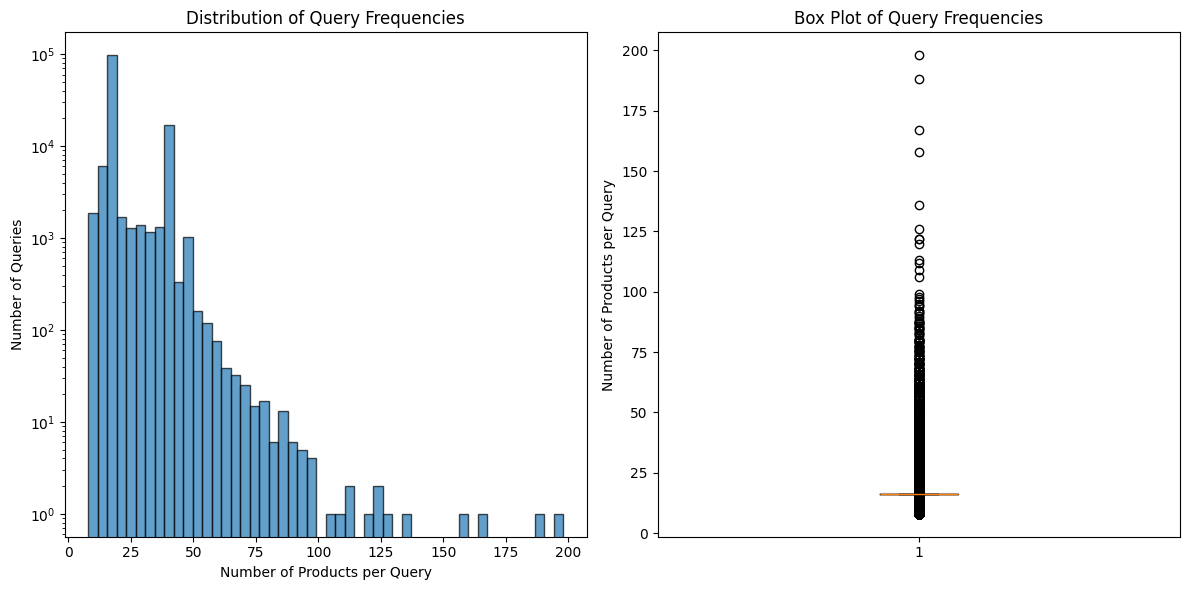

Total queries: 130652
Mean products per query: 20.06
Median products per query: 16.00
Max products per query: 198
Min products per query: 8


In [23]:
import matplotlib.pyplot as plt

# Draw histogram of query frequencies
query_counts = df_examples_products["query_id"].value_counts()

plt.figure(figsize=(12, 6))

# Histogram of query frequencies
plt.subplot(1, 2, 1)
plt.hist(query_counts, bins=50, edgecolor="black", alpha=0.7)
plt.title("Distribution of Query Frequencies")
plt.xlabel("Number of Products per Query")
plt.ylabel("Number of Queries")
plt.yscale("log")

# Box plot for better understanding of distribution
plt.subplot(1, 2, 2)
plt.boxplot(query_counts, vert=True)
plt.title("Box Plot of Query Frequencies")
plt.ylabel("Number of Products per Query")

plt.tight_layout()
plt.show()

print(f"Total queries: {len(query_counts)}")
print(f"Mean products per query: {query_counts.mean():.2f}")
print(f"Median products per query: {query_counts.median():.2f}")
print(f"Max products per query: {query_counts.max()}")
print(f"Min products per query: {query_counts.min()}")

### Query Frequency Visualization

The histogram shows the distribution of how many products are associated with each query. Most queries have relatively few products, while some popular queries have many candidates.

In [ ]:
# Print histogram bin counts
query_counts = df_examples_products["query_id"].value_counts()

# Create histogram and get bin info
counts, bins, patches = plt.hist(query_counts, bins=50, alpha=0)
plt.close()  # Close the plot we don't want to show

print("Histogram bin analysis:")
print("Bin Range\t\tCount of Queries")
print("-" * 40)

for i in range(len(counts)):
    bin_start = int(bins[i])
    bin_end = int(bins[i + 1])
    count = int(counts[i])
    print(f"{bin_start:3d} - {bin_end:3d}\t\t{count}")

print(f"\nTotal bins: {len(counts)}")
print(f"Total queries across all bins: {sum(counts)}")

# Also show percentile breakdown
print("\nPercentile breakdown:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = query_counts.quantile(p / 100)
    print(f"{p}th percentile: {value:.1f} products per query")

### Histogram Bin Analysis

This detailed breakdown shows exactly how many queries fall into each frequency range, helping us understand the long-tail distribution of query popularity.

In [ ]:
# Create dataframe with top 5 queries
top_5_query_ids = df_examples_products["query_id"].value_counts().head(5).index

# Filter for top 5 queries
df_top_5_queries = df_examples_products[
    df_examples_products["query_id"].isin(top_5_query_ids)
].copy()

print(f"Created df_top_5_queries with {len(df_top_5_queries)} rows")
print(f"Queries included: {top_5_query_ids.tolist()}")
print("\nQuery breakdown:")
for query_id in top_5_query_ids:
    query_text = df_top_5_queries[df_top_5_queries["query_id"] == query_id][
        "query"
    ].iloc[0]
    count = len(df_top_5_queries[df_top_5_queries["query_id"] == query_id])
    print(f"  {query_id}: '{query_text}' ({count} products)")

df_top_5_queries

## Key Insights & Next Steps

### Key Findings:
1. **Label Distribution**: ~65% Exact matches, ~22% Substitutes, ~10% Irrelevant, ~3% Complements
2. **Query Frequency**: Highly skewed distribution with few queries having many products
3. **Data Quality**: Mix of sources with majority being "other" category
4. **Multilingual**: Includes queries in multiple languages (English, Spanish, Japanese)

### For Query2Dish Model:
- Focus on food-related queries and products
- Understand substitute relationships for food items
- Consider nutritional/cooking method similarities
- Adapt ESCI framework for culinary context

The `df_top_5_queries` dataframe is now available for further exploration of the most popular search patterns.

## Top Queries Deep Dive

Focusing on the most popular queries to understand what types of searches generate the most product candidates and their ESCI label distributions.

In [104]:
df_top_5_queries[["query", "product_title", "esci_label"]].sample(5)

,query,product_title,esci_label
171642,airpods,"RUOQINI Smartwatch Band with Case Compatiable for Apple Watch Band, Silicone Sport Band And TPU Case for Series 4/3/2/1,Pink Sand Band with Rose Pink Case in 40SM Size",I
171518,airpods,Single Earbuds Replacement with Detachable Ear Hooks for AirPods 2nd Generation R Right Side,S
1815665,shoes,"New Balance Women's 890 V7 Running Shoe, White/Guava Glo/Bleached Lime Glo, 9.5 M US",E
171612,airpods,"BRG for AirPods Case,Soft Cute Silicone Cover for Apple Airpods 2 & 1 Cases with Pom Pom Fur Ball Keychain/Strap/Accessories for Women Girls (Front LED Visible) Light Pink",C
2066793,tv,"SAMSUNG 55-Inch Class Crystal UHD TU-8000 Series - 4K UHD HDR Smart TV with Alexa Built-in (UN55TU8000FXZA, 2020 Model)",E


In [40]:
df_top_5_queries.columns

Index(['example_id', 'query', 'query_id', 'product_id', 'product_locale',
       'esci_label', 'small_version', 'large_version', 'split',
       'product_title', 'product_description', 'product_bullet_point',
       'product_brand', 'product_color'],
      dtype='object')